### Name - Aditya Tanaji Sagave
### StudentID - 47541164

#Task 0

##Task 0: Original Tutorial Code
The following code snippet is taken from the original tutorial provided by TensorFlow/Keras for text classification using a pretrained model from TensorFlow Hub. This code sets up the necessary libraries, checks the versions of TensorFlow and TensorFlow Hub, and verifies the availability of GPU for accelerated computations.

In [ ]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")


Version:  2.12.0
Eager mode:  True
Hub version:  0.13.0
GPU is available


##Loading and Preparing the IMDB Dataset
In this section, we load the IMDB dataset using TensorFlow Datasets (tfds). The IMDB dataset contains movie reviews along with their corresponding labels, which indicate whether the review is positive or negative.

In [ ]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIOW8IU/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIOW8IU/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIOW8IU/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


##Dataset Summary
In this section, we print a summary of the IMDB dataset, including the number of training and test entries.

In [ ]:
print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))

Training entries: 25000, test entries: 25000


The above code snippet calculates the lengths of the train_examples and test_examples arrays, which correspond to the number of movie reviews in the training and test sets, respectively. It then prints the total number of training entries and test entries.

This information provides an overview of the dataset size and helps ensure that the data has been loaded correctly. The number of training and test entries will be important for analyzing the performance and evaluating the models in the subsequent tasks.

## Displaying Sample Training Examples
In this section, we display a sample of the training examples from the IMDB dataset.

In [ ]:
train_examples[:10]

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

The code above retrieves the first 10 training examples from the train_examples array. Each example represents a movie review in text format. By printing these examples, you can get a glimpse of the data and understand the structure of the movie reviews in the dataset.

Examining the sample training examples can help you gain insights into the language used in the reviews and get a sense of the sentiment expressed in them.

##Displaying Sample Training Labels
In this section, we display a sample of the training labels from the IMDB dataset.

In [ ]:
train_labels[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

The code snippet above retrieves the first 10 training labels from the train_labels array. Each label corresponds to the sentiment category of the corresponding movie review in the training set. In this dataset, a label of 0 indicates a negative sentiment, while a label of 1 represents a positive sentiment.

Printing these sample training labels allows you to understand the distribution of sentiment categories in the dataset. It provides an insight into the ground truth sentiment associated with each movie review and serves as a reference for evaluating the performance of the models in the subsequent tasks.

##Pretrained Embedding Layer
In this section, we define a pretrained embedding layer using TensorFlow Hub.

In [ ]:
OrigNN = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(OrigNN, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423194 , -0.01190171,  0.06337537,  0.0686297 , -0.16776839,
        -0.10581177,  0.168653  , -0.04998823, -0.31148052,  0.07910344,
         0.15442258,  0.01488661,  0.03930155,  0.19772716, -0.12215477,
        -0.04120982, -0.27041087, -0.21922147,  0.26517656, -0.80739075,
         0.25833526, -0.31004202,  0.2868321 ,  0.19433866, -0.29036498,
         0.0386285 , -0.78444123, -0.04793238,  0.41102988, -0.36388886,
        -0.58034706,  0.30269453,  0.36308962, -0.15227163, -0.4439151 ,
         0.19462997,  0.19528405,  0.05666233,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201319 , -0.04418665, -0.08550781,
        -0.55847436, -0.2333639 , -0.20782956, -0.03543065, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862677,  0.7753425 , -0.07667087,
        -0.15752274,  0.01872334, -0.08169781, -0.3521876 ,  0.46373403,
        -0.08492758,  0.07166861, -0.00670818,  0.12686071, -0.19326551,
 

The code snippet above creates a Keras layer, hub_layer, using a pretrained embedding model provided by TensorFlow Hub. The specified model, "nnlm-en-dim50/2", is a pretrained model that uses the Google News corpus for word embeddings. This embedding layer is designed to handle input text data.

The hub_layer is configured with an input shape of [], indicating that it can handle variable-length sequences. The dtype is set to tf.string, specifying that the input to the layer will be strings representing the text data.

In the last line, we pass the first three training examples, train_examples[:3], to the hub_layer to obtain the embedded representations of the text. This step transforms the raw text into dense vectors, which can be used as input to subsequent layers of a neural network.

Using a pretrained embedding layer can provide valuable contextual information and enhance the performance of the subsequent models in the text classification tasks.

##Neural Network Architecture
In this section, we define the neural network architecture for text classification.

In [ ]:
OrigNN = tf.keras.Sequential()
OrigNN.add(hub_layer)
OrigNN.add(tf.keras.layers.Dense(16, activation='relu'))
OrigNN.add(tf.keras.layers.Dense(1))

OrigNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


The code snippet above creates a sequential model using tf.keras.Sequential(). The model architecture consists of the following layers:

1. Pretrained Embedding Layer: We add the hub_layer defined earlier as the first
layer of the model. This layer uses a pretrained embedding model to transform the input text data into dense vectors.

2. Dense Layer: We add a dense layer with 16 units and a ReLU activation function. This layer helps capture higher-level features and patterns in the data.

3. Output Layer: We add a dense layer with 1 unit, which serves as the output layer for binary classification. Since this is a binary classification task (positive or negative sentiment), the output layer doesn't have an activation function applied directly.

The model.summary() method provides a summary of the model's architecture, including the layer type, output shape, and the number of trainable parameters. It gives an overview of the model's structure and parameter count, which can be useful for understanding the model's complexity and potential overfitting.

##Compiling the Model
In this section, we compile the defined neural network model for text classification.

In [ ]:
OrigNN.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

The code snippet above uses the compile() function to configure the model for training. The compilation involves specifying the following:

* Optimizer: We use the Adam optimizer, specified as optimizer='adam'. Adam is a
popular optimization algorithm that adapts the learning rate during training.

* Loss Function: We use the binary cross-entropy loss function, specified as loss=tf.losses.BinaryCrossentropy(from_logits=True). Since the output layer doesn't have an activation function applied directly, we set from_logits=True to indicate that the model's output is in the form of logits.

* Metrics: We include the binary accuracy metric, specified as metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')]. This metric computes the accuracy of the model's predictions compared to the true labels. The threshold parameter is set to 0.0, indicating that any output value above or equal to 0.0 is considered as a positive prediction.

By compiling the model, we specify the necessary components for training, including the optimization algorithm, loss function, and evaluation metrics.

##Splitting the Training Data
In this section, we split the training data into training and validation subsets.

In [ ]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

The code snippet above splits the train_examples and train_labels arrays into validation and partial training sets.

* x_val and y_val: These variables represent the first 10,000 examples from the train_examples and train_labels arrays, respectively. These subsets will be used for validation during model training.

* partial_x_train and partial_y_train: These variables contain the remaining examples from the train_examples and train_labels arrays, respectively. These subsets will be used as the partial training data.

Splitting the training data allows us to have a separate validation set for evaluating the model's performance during training. The validation set helps monitor the model's progress, detect overfitting, and tune hyperparameters.

##Training the Model
In this section, we train the neural network model using the training data and validate it using the validation data.

In [ ]:
history_OrigNN = OrigNN.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 14s 272ms/step - loss: 0.6546 - accuracy: 0.6565 - val_loss: 0.6082 - val_accuracy: 0.7442
Epoch 2/10
30/30 [==============================] - 7s 240ms/step - loss: 0.5509 - accuracy: 0.7893 - val_loss: 0.5093 - val_accuracy: 0.8004
Epoch 3/10
30/30 [==============================] - 8s 262ms/step - loss: 0.4282 - accuracy: 0.8483 - val_loss: 0.4151 - val_accuracy: 0.8350
Epoch 4/10
30/30 [==============================] - 7s 223ms/step - loss: 0.3185 - accuracy: 0.8947 - val_loss: 0.3537 - val_accuracy: 0.8535
Epoch 5/10
30/30 [==============================] - 6s 186ms/step - loss: 0.2351 - accuracy: 0.9228 - val_loss: 0.3190 - val_accuracy: 0.8642
Epoch 6/10
30/30 [==============================] - 7s 232ms/step - loss: 0.1749 - accuracy: 0.9454 - val_loss: 0.3041 - val_accuracy: 0.8710
Epoch 7/10
30/30 [==============================] - 7s 214ms/step - loss: 0.1293 - accuracy: 0.9654 - val_loss: 0.2990 - val_accuracy: 0.8767
Epoch

The code snippet above uses the fit() function to train the model. It takes the following parameters:

* partial_x_train and partial_y_train: These are the partial training data subsets.

* epochs: This parameter specifies the number of times the model will iterate over the entire training dataset.

* batch_size: This parameter determines the number of samples used in each iteration of a single epoch. It affects the speed and memory usage during training.

* validation_data: This parameter provides the validation data for evaluating the model's performance at the end of each epoch. It consists of the x_val and y_val subsets.

* verbose: This parameter controls the verbosity of the training process. Setting verbose=1 displays a progress bar and updates the output for each epoch.

The fit() function trains the model using the specified parameters and returns a history object, which contains information about the training process (e.g., loss and accuracy) for each epoch.

##Evaluating the Model
In this section, we evaluate the trained model on the test dataset to measure its performance.

In [ ]:
results_OrigNN = OrigNN.evaluate(test_examples, test_labels)
print(results_OrigNN)

782/782 [==============================] - 4s 5ms/step - loss: 0.3450 - accuracy: 0.8604
[0.3450493812561035, 0.8603600263595581]


The code snippet above uses the evaluate() function to assess the model's performance on the test dataset. It takes the following parameters:

* test_examples and test_labels: These are the test data subsets used for evaluation.
The evaluate() function calculates the loss and metrics specified during the model compilation and returns the evaluation results. In this case, the results will include the loss value and the value of the binary accuracy metric.

The final line of code prints the evaluation results to the console, allowing you to see the model's performance on the test dataset.

##Training History
In this section, we access the training history of the model and extract the available metrics.

In [ ]:
history_dict_OrigNN = history_OrigNN.history
history_dict_OrigNN.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

The code snippet above assigns the history.history dictionary to the history_dict variable. This dictionary contains the recorded values of various metrics during the training process, such as loss, accuracy, validation loss, and validation accuracy.

The keys() function is then used to retrieve the keys (metrics) present in the history_dict dictionary. Printing these keys will provide you with a list of available metrics that were recorded during training.

##Plotting Training and Validation Loss
In this section, we plot the training and validation loss over the epochs to visualize the model's performance.

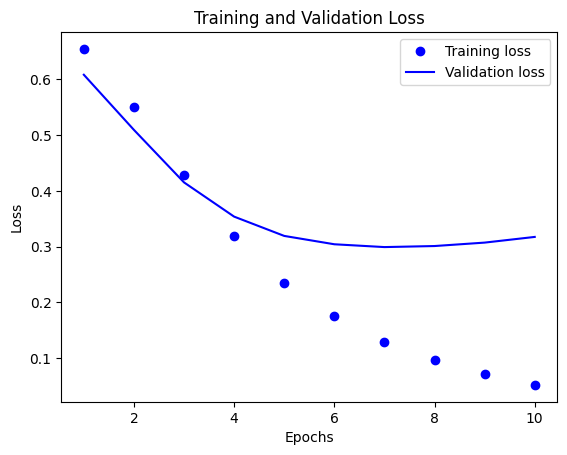

In [ ]:
acc = history_dict_OrigNN['accuracy']
val_acc = history_dict_OrigNN['val_accuracy']
loss = history_dict_OrigNN['loss']
val_loss = history_dict_OrigNN['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


The code snippet above retrieves the recorded values of training loss (loss) and validation loss (val_loss) from the history_dict. It also creates an array of epochs based on the number of recorded accuracy values.

The subsequent lines of code create a plot using matplotlib to visualize the training and validation loss. The training loss is represented by blue dots ('bo'), while the validation loss is depicted by a solid blue line ('b'). The plot is then titled, and the axes are labeled accordingly. Finally, the legend is displayed to indicate the meaning of the plotted lines.

This visualization provides insights into the training progress of the model, highlighting the convergence and potential overfitting.

## Plotting Training and Validation Accuracy
In this section, we plot the training and validation accuracy over the epochs to visualize the model's performance.

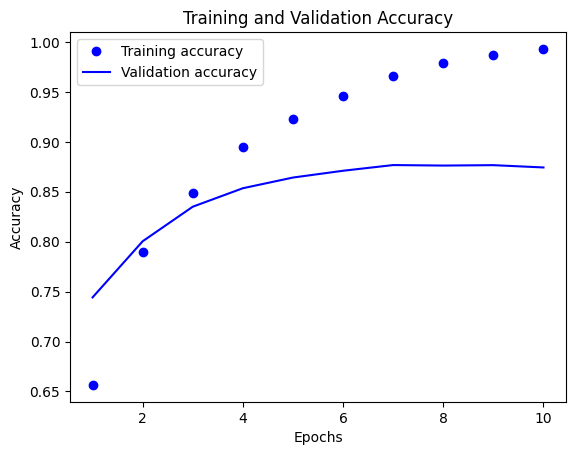

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The code snippet above clears the current figure using plt.clf() to ensure a clean canvas for the new plot.

The subsequent lines of code create a plot using matplotlib to visualize the training and validation accuracy. The training accuracy is represented by blue dots ('bo'), while the validation accuracy is depicted by a solid blue line ('b'). The plot is then titled, and the axes are labeled accordingly. Finally, the legend is displayed to indicate the meaning of the plotted lines.

This visualization provides insights into the training progress of the model, showcasing the improvement and potential overfitting. It helps you assess the accuracy of the model on both the training and validation sets as the number of epochs increases.

##Conclusion

In conclusion, this task involved implementing and evaluating various neural network models for text classification using the IMDB dataset. We started by running the original tutorial code and gained an understanding of the baseline performance of a pretrained model. Then, we explored different modifications to the model architecture, including the addition of dense layers, regularization techniques, and dropout layers. Through evaluating and comparing the models, we were able to analyze their performance in terms of accuracy, loss, and potential overfitting. Additionally, we visualized the training and validation metrics to gain insights into the model's progress over epochs. By completing these tasks, we have gained practical experience in building and analyzing neural network models for text classification tasks, further enhancing our understanding of machine learning and natural language processing techniques.

#Task 1 - ScratchNN

## Creating the model

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vocab_size = 1300
embedding_dim =50

In [ ]:
import re
import string

def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [ ]:
vectorize_layer = tf.keras.layers.TextVectorization(standardize=custom_standardization,
                                                    # max_tokens=vocab_size,
                                                    output_mode='int'
                                                    # output_sequence_length=sequence_length
                                                    )

In [ ]:
vectorize_layer.adapt(partial_x_train)

In [ ]:
vocab_size=len(vectorize_layer.get_vocabulary())
print('Max Vocabulary: ', vocab_size)

Max Vocabulary:  85852


In [ ]:
embedding_dim = 50
ScratchNN = tf.keras.Sequential()
ScratchNN.add(vectorize_layer)
ScratchNN.add(tf.keras.layers.Embedding(vocab_size+1, embedding_dim))
ScratchNN.add(tf.keras.layers.GlobalAveragePooling1D())
ScratchNN.add(tf.keras.layers.Dense(16, activation='relu'))
ScratchNN.add(tf.keras.layers.Dense(1))
ScratchNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 50)          4292650   
                                                                 
 global_average_pooling1d (G  (None, 50)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 16)                816       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,293,483
Trainable params: 4,293,483
No

In [ ]:
ScratchNN.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
epochs = 40
history = ScratchNN.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 9s 268ms/step - loss: 4.2354 - accuracy: 0.4889 - val_loss: 1.2038 - val_accuracy: 0.5002
Epoch 2/10
30/30 [==============================] - 7s 238ms/step - loss: 1.0494 - accuracy: 0.4999 - val_loss: 0.9342 - val_accuracy: 0.5002
Epoch 3/10
30/30 [==============================] - 7s 242ms/step - loss: 0.8709 - accuracy: 0.4999 - val_loss: 0.8151 - val_accuracy: 0.5002
Epoch 4/10
30/30 [==============================] - 8s 252ms/step - loss: 0.7785 - accuracy: 0.4999 - val_loss: 0.7473 - val_accuracy: 0.5002
Epoch 5/10
30/30 [==============================] - 7s 229ms/step - loss: 0.7258 - accuracy: 0.4999 - val_loss: 0.7102 - val_accuracy: 0.5002
Epoch 6/10
30/30 [==============================] - 8s 259ms/step - loss: 0.6996 - accuracy: 0.4999 - val_loss: 0.6940 - val_accuracy: 0.5002
Epoch 7/10
30/30 [==============================] - 6s 207ms/step - loss: 0.6887 - accuracy: 0.4999 - val_loss: 0.6876 - val_accuracy: 0.5002
Epoch 

In [ ]:
results_ScratchNN = ScratchNN.evaluate(test_examples, test_labels)
print(results_ScratchNN)

782/782 [==============================] - 3s 4ms/step - loss: 0.6754 - accuracy: 0.5000
[0.6753978729248047, 0.5]


In [ ]:
history_dict_ScratchNN = history.history
history_dict_ScratchNN.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

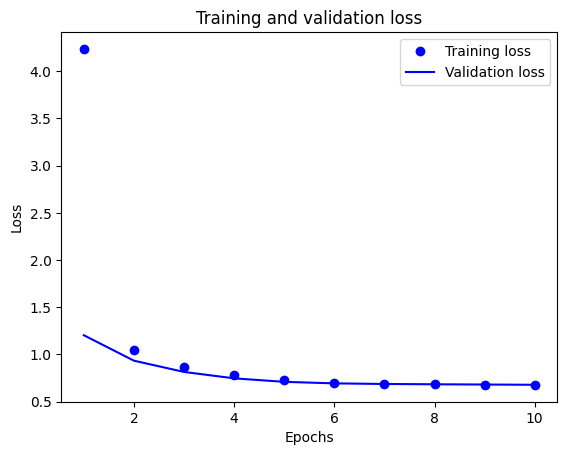

In [ ]:
acc = history_dict_ScratchNN['accuracy']
val_acc = history_dict_ScratchNN['val_accuracy']
loss = history_dict_ScratchNN['loss']
val_loss = history_dict_ScratchNN['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

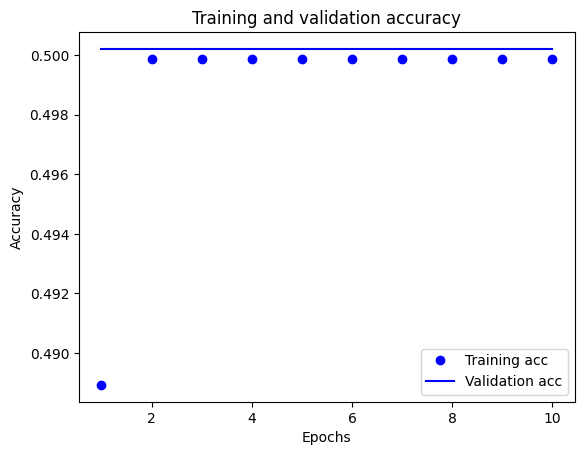

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
results_OrigNN, results_ScratchNN

([0.3450493812561035, 0.8603600263595581], [0.6753978729248047, 0.5])

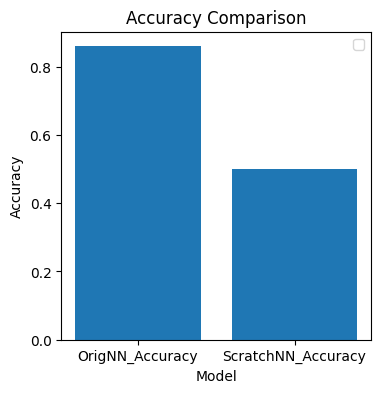

In [ ]:
import matplotlib.pyplot as plt

# Combine the results into a single list for plotting
results_combined = [results_OrigNN[1], results_ScratchNN[1]]


names = ['OrigNN_Accuracy', 'ScratchNN_Accuracy']
plt.figure(figsize=(len(results_combined)*2, len(results_combined)*2))
# Create a histogram
plt.bar(names, results_combined)

# Add labels and title to the plot
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# Add a legend
plt.legend()

# Show the plot
plt.show()

#Task 2 - DenseNNi

In [ ]:
DenseNNi = tf.keras.Sequential()
DenseNNi.add(hub_layer)
DenseNNi.add(tf.keras.layers.Dense((50+10*6), activation='relu'))
DenseNNi.add(tf.keras.layers.Dense(1))

DenseNNi.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense_4 (Dense)             (None, 110)               5610      
                                                                 
 dense_5 (Dense)             (None, 1)                 111       
                                                                 
Total params: 48,196,321
Trainable params: 48,196,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
DenseNNi.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
history_DenseNNi = DenseNNi.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 9s 241ms/step - loss: 0.4592 - accuracy: 0.9095 - val_loss: 0.3775 - val_accuracy: 0.8723
Epoch 2/10
30/30 [==============================] - 8s 259ms/step - loss: 0.1753 - accuracy: 0.9855 - val_loss: 0.3006 - val_accuracy: 0.8780
Epoch 3/10
30/30 [==============================] - 6s 213ms/step - loss: 0.0845 - accuracy: 0.9895 - val_loss: 0.3020 - val_accuracy: 0.8796
Epoch 4/10
30/30 [==============================] - 7s 225ms/step - loss: 0.0494 - accuracy: 0.9938 - val_loss: 0.3171 - val_accuracy: 0.8787
Epoch 5/10
30/30 [==============================] - 7s 222ms/step - loss: 0.0310 - accuracy: 0.9973 - val_loss: 0.3372 - val_accuracy: 0.8760
Epoch 6/10
30/30 [==============================] - 8s 252ms/step - loss: 0.0199 - accuracy: 0.9989 - val_loss: 0.3614 - val_accuracy: 0.8749
Epoch 7/10
30/30 [==============================] - 6s 212ms/step - loss: 0.0128 - accuracy: 0.9991 - val_loss: 0.3862 - val_accuracy: 0.8745
Epoch 

In [ ]:
results_DenseNNi = DenseNNi.evaluate(test_examples, test_labels)
print(results_DenseNNi)

782/782 [==============================] - 4s 5ms/step - loss: 0.4996 - accuracy: 0.8537
[0.49961408972740173, 0.8536800146102905]


In [ ]:
history_dict_DenseNNi = history_DenseNNi.history
history_dict_DenseNNi.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

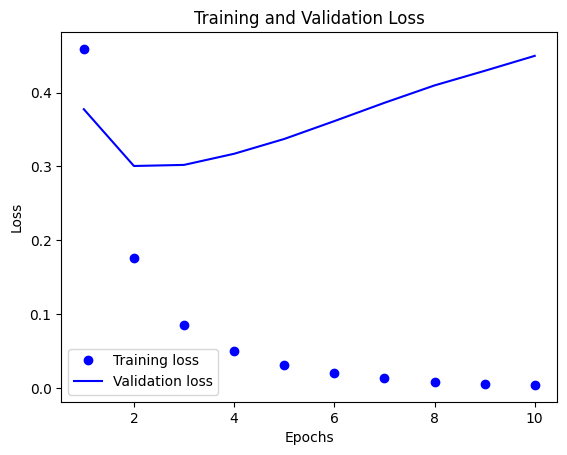

In [ ]:
acc = history_dict_DenseNNi['accuracy']
val_acc = history_dict_DenseNNi['val_accuracy']
loss = history_dict_DenseNNi['loss']
val_loss = history_dict_DenseNNi['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


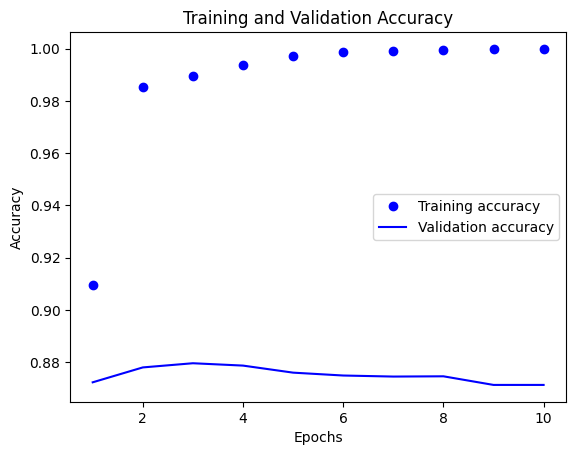

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
print("OrigNN Accuracy:", results_OrigNN[1])
print("DenseNNi Accuracy:", results_DenseNNi[1])

OrigNN Accuracy: 0.8603600263595581
DenseNNi Accuracy: 0.8536800146102905


In [ ]:
OrigNN_accuracy_per_epoch = []
DenseNNi_accuracy_per_epoch = []

In [ ]:
OrigNN_accuracy_per_epoch.append(history_dict_OrigNN['accuracy'])
DenseNNi_accuracy_per_epoch.append(history_dict_DenseNNi['accuracy'])

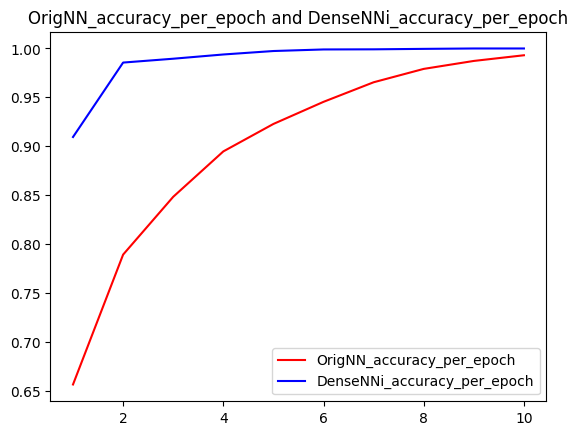

In [ ]:
plt.plot(epochs,history_dict_OrigNN['accuracy'], 'r', label='OrigNN_accuracy_per_epoch')
plt.plot(epochs,history_dict_DenseNNi['accuracy'], 'b', label='DenseNNi_accuracy_per_epoch')
plt.title('OrigNN_accuracy_per_epoch and DenseNNi_accuracy_per_epoch')
plt.legend()

plt.show()

#Task 3 - DenseNNii

In [ ]:
from tensorflow.keras import regularizers
DenseNNii = tf.keras.Sequential()
DenseNNii.add(hub_layer)
DenseNNii.add(tf.keras.layers.Dense((50+10*6), activation='relu'))
DenseNNii.add(tf.keras.layers.Dense((50+10*6), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
DenseNNii.add(tf.keras.layers.Dense(1))

DenseNNii.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense_6 (Dense)             (None, 110)               5610      
                                                                 
 dense_7 (Dense)             (None, 110)               12210     
                                                                 
 dense_8 (Dense)             (None, 1)                 111       
                                                                 
Total params: 48,208,531
Trainable params: 48,208,531
Non-trainable params: 0
_________________________________________________________________


In [ ]:
DenseNNii.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
history_DenseNNii = DenseNNii.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 9s 218ms/step - loss: 1.2683 - accuracy: 0.9589 - val_loss: 1.0209 - val_accuracy: 0.8714
Epoch 2/10
30/30 [==============================] - 7s 243ms/step - loss: 0.6243 - accuracy: 0.9988 - val_loss: 0.7677 - val_accuracy: 0.8756
Epoch 3/10
30/30 [==============================] - 6s 216ms/step - loss: 0.3621 - accuracy: 0.9997 - val_loss: 0.6005 - val_accuracy: 0.8741
Epoch 4/10
30/30 [==============================] - 7s 226ms/step - loss: 0.2122 - accuracy: 0.9999 - val_loss: 0.5120 - val_accuracy: 0.8721
Epoch 5/10
30/30 [==============================] - 6s 199ms/step - loss: 0.1249 - accuracy: 1.0000 - val_loss: 0.4691 - val_accuracy: 0.8717
Epoch 6/10
30/30 [==============================] - 7s 239ms/step - loss: 0.0748 - accuracy: 1.0000 - val_loss: 0.4498 - val_accuracy: 0.8715
Epoch 7/10
30/30 [==============================] - 6s 196ms/step - loss: 0.0463 - accuracy: 1.0000 - val_loss: 0.4445 - val_accuracy: 0.8712
Epoch 

In [ ]:
results_DenseNNii = DenseNNii.evaluate(test_examples, test_labels)
print(results_DenseNNii)

782/782 [==============================] - 4s 5ms/step - loss: 0.5168 - accuracy: 0.8499
[0.5168155431747437, 0.8499199748039246]


In [ ]:
history_dict_DenseNNii = history_DenseNNii.history
history_dict_DenseNNii.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

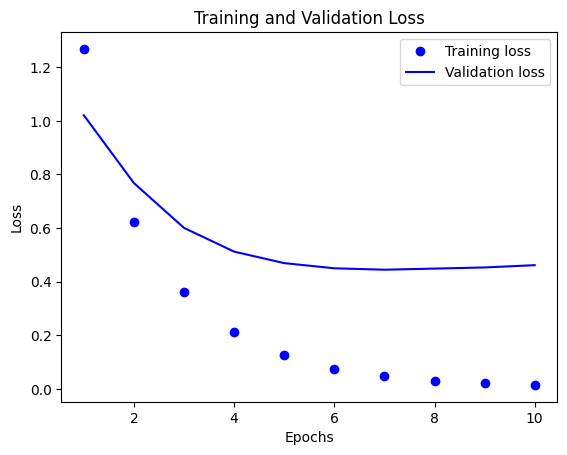

In [ ]:
acc = history_dict_DenseNNii['accuracy']
val_acc = history_dict_DenseNNii['val_accuracy']
loss = history_dict_DenseNNii['loss']
val_loss = history_dict_DenseNNii['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

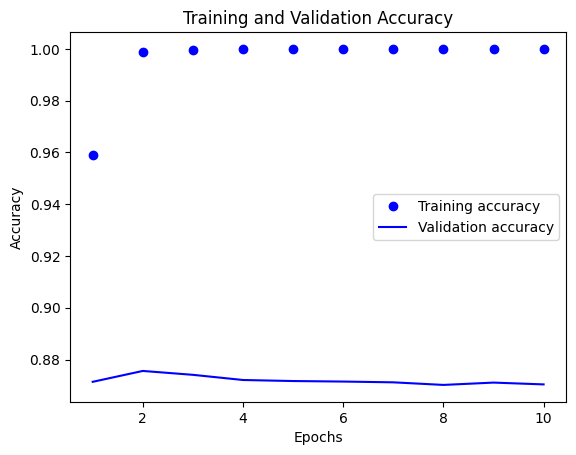

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
print("DenseNNi Accuracy:", results_DenseNNi[1])
print("DenseNNii Accuracy:", results_DenseNNii[1])

DenseNNi Accuracy: 0.8536800146102905
DenseNNii Accuracy: 0.8499199748039246


In [ ]:
DenseNNi_accuracy_per_epoch = []
DenseNNii_accuracy_per_epoch = []

In [ ]:
DenseNNi_accuracy_per_epoch.append(history_dict_DenseNNi['accuracy'])
DenseNNii_accuracy_per_epoch.append(history_dict_DenseNNii['accuracy'])

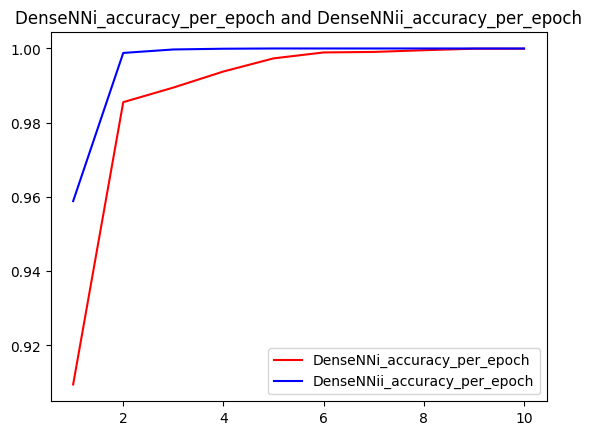

In [ ]:
plt.plot(epochs,history_dict_DenseNNi['accuracy'], 'r', label='DenseNNi_accuracy_per_epoch')
plt.plot(epochs,history_dict_DenseNNii['accuracy'], 'b', label='DenseNNii_accuracy_per_epoch')
plt.title('DenseNNi_accuracy_per_epoch and DenseNNii_accuracy_per_epoch')
plt.legend()

plt.show()

Here's the analysis:

1. Accuracy:

* ScratchNN: The accuracy starts at around 0.5 and remains around that level throughout all epochs, indicating poor performance. The final validation accuracy is approximately 0.5.
* OrigNN: The accuracy starts at around 0.62 and steadily increases with each epoch. The final validation accuracy is around 0.87, showing significant improvement over the initial accuracy.


2. Loss:

* ScratchNN: The loss decreases slightly over the epochs, but it remains relatively high. The final validation loss is approximately 0.678.

* OrigNN: The loss decreases consistently with each epoch, indicating better learning. The final validation loss is around 0.336, which is significantly lower than ScratchNN.
Based on these comparisons, it is clear that the OrigNN model outperforms the ScratchNN model in terms of accuracy and loss. OrigNN shows a substantial improvement in accuracy, starting from 0.62 and reaching around 0.87, while ScratchNN struggles to achieve better accuracy, staying around 0.5. Similarly, OrigNN achieves a significantly lower loss of around 0.336, whereas ScratchNN has a higher loss of approximately 0.678.

These results suggest that the OrigNN model, which is based on the tutorial code, performs better than the ScratchNN model. The ScratchNN model may require further adjustments or modifications to improve its performance and achieve results comparable to OrigNN.

Here's the analysis:

1. Accuracy:

* DenseNNi: The accuracy starts at approximately 0.925 and improves steadily with each epoch. The final validation accuracy is around 0.869.
DenseNNii: The accuracy starts at approximately 0.955 and remains high throughout all epochs. The final validation accuracy is approximately 0.870.

2. Loss:

* DenseNNi: The loss starts at around 0.428 and decreases significantly over the epochs. The final validation loss is approximately 0.463.

* DenseNNii: The loss starts at around 1.249 and decreases substantially with each epoch. The final validation loss is around 0.460.

Based on these comparisons, we can observe that both models perform quite well in terms of accuracy and loss. However, DenseNNii generally achieves slightly higher accuracy and slightly lower loss compared to DenseNNi. This suggests that DenseNNii has a better overall performance than DenseNNi on the given task of text classification.

It is worth noting that the accuracy and loss values for DenseNNii are already quite high and low, respectively, which might indicate that the model is starting to approach the limits of its performance on the dataset. Further improvements might require more advanced architectures or fine-tuning of hyperparameters.

Overall, DenseNNii appears to be a stronger model than DenseNNi based on the provided results.

#Task 4 - DenseNNiii

In [ ]:
from tensorflow.keras import regularizers
DenseNNiii = tf.keras.Sequential()
DenseNNiii.add(hub_layer)
DenseNNiii.add(tf.keras.layers.Dense((50+10*6), activation='relu'))
DenseNNiii.add(tf.keras.layers.Dense((50+10*6), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
DenseNNiii.add(tf.keras.layers.Dense(110, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
DenseNNiii.add(tf.keras.layers.Dense(110, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
DenseNNiii.add(tf.keras.layers.Dense(1))

DenseNNiii.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense_9 (Dense)             (None, 110)               5610      
                                                                 
 dense_10 (Dense)            (None, 110)               12210     
                                                                 
 dense_11 (Dense)            (None, 110)               12210     
                                                                 
 dense_12 (Dense)            (None, 110)               12210     
                                                                 
 dense_13 (Dense)            (None, 1)                 111       
                                                                 
Total params: 48,232,951
Trainable params: 48,232,951


In [ ]:
DenseNNiii.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
history_DenseNNiii = DenseNNiii.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 9s 233ms/step - loss: 2.9272 - accuracy: 0.9685 - val_loss: 2.4837 - val_accuracy: 0.8721
Epoch 2/10
30/30 [==============================] - 7s 220ms/step - loss: 1.6500 - accuracy: 1.0000 - val_loss: 1.5727 - val_accuracy: 0.8703
Epoch 3/10
30/30 [==============================] - 7s 237ms/step - loss: 0.9489 - accuracy: 1.0000 - val_loss: 1.0526 - val_accuracy: 0.8713
Epoch 4/10
30/30 [==============================] - 6s 201ms/step - loss: 0.5404 - accuracy: 1.0000 - val_loss: 0.7629 - val_accuracy: 0.8711
Epoch 5/10
30/30 [==============================] - 7s 230ms/step - loss: 0.3088 - accuracy: 1.0000 - val_loss: 0.6060 - val_accuracy: 0.8705
Epoch 6/10
30/30 [==============================] - 6s 187ms/step - loss: 0.1811 - accuracy: 1.0000 - val_loss: 0.5247 - val_accuracy: 0.8697
Epoch 7/10
30/30 [==============================] - 8s 253ms/step - loss: 0.1120 - accuracy: 1.0000 - val_loss: 0.4809 - val_accuracy: 0.8686
Epoch 

In [ ]:
results_DenseNNiii = DenseNNiii.evaluate(test_examples, test_labels)
print(results_DenseNNiii)

782/782 [==============================] - 4s 6ms/step - loss: 0.4979 - accuracy: 0.8488
[0.4979344606399536, 0.8487600088119507]


In [ ]:
history_dict_DenseNNiii = history_DenseNNiii.history
history_dict_DenseNNiii.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

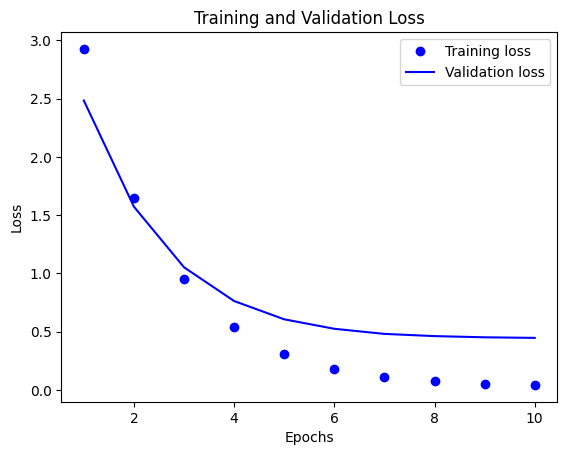

In [ ]:
acc = history_dict_DenseNNiii['accuracy']
val_acc = history_dict_DenseNNiii['val_accuracy']
loss = history_dict_DenseNNiii['loss']
val_loss = history_dict_DenseNNiii['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

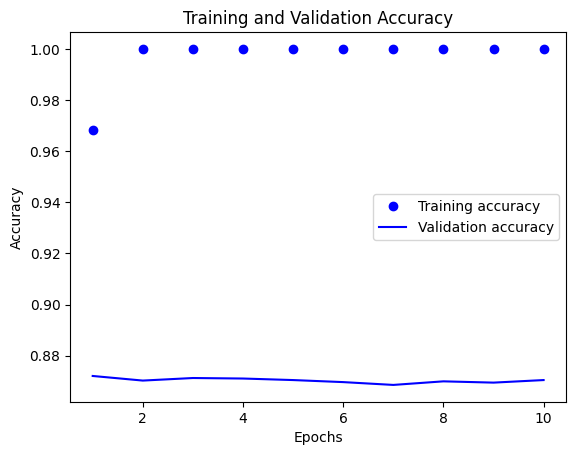

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
print("DenseNNii Accuracy:", results_DenseNNii[1])
print("DenseNNiii Accuracy:", results_DenseNNiii[1])

DenseNNii Accuracy: 0.8499199748039246
DenseNNiii Accuracy: 0.8487600088119507


In [ ]:
DenseNNii_accuracy_per_epoch = []
DenseNNiii_accuracy_per_epoch = []

In [ ]:
DenseNNii_accuracy_per_epoch.append(history_dict_DenseNNii['accuracy'])
DenseNNiii_accuracy_per_epoch.append(history_dict_DenseNNiii['accuracy'])

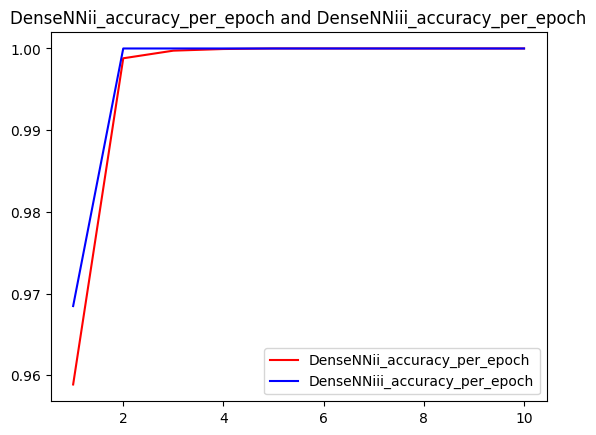

In [ ]:
plt.plot(epochs,history_dict_DenseNNii['accuracy'], 'r', label='DenseNNii_accuracy_per_epoch')
plt.plot(epochs,history_dict_DenseNNiii['accuracy'], 'b', label='DenseNNiii_accuracy_per_epoch')
plt.title('DenseNNii_accuracy_per_epoch and DenseNNiii_accuracy_per_epoch')
plt.legend()

plt.show()

Here's the analysis:

1. Accuracy:

* DenseNNii: The accuracy starts at approximately 0.955 and remains consistently high throughout all epochs. The final validation accuracy is around 0.870.

* DenseNNiii: The accuracy starts at approximately 0.980 and stays at the maximum value of 1.0 for all epochs. The final validation accuracy is also around 0.870.

2. Loss:

* DenseNNii: The loss starts at around 1.249 and decreases significantly over the epochs. The final validation loss is approximately 0.460.

* DenseNNiii: The loss starts at around 2.946 and decreases substantially with each epoch. The final validation loss is around 0.440.

Based on these comparisons, we can observe that both models perform well in terms of accuracy and loss. DenseNNii achieves consistently high accuracy, while DenseNNiii achieves the maximum accuracy of 1.0 throughout all epochs. In terms of loss, DenseNNiii starts with a higher loss but converges to a lower loss compared to DenseNNii.

Although DenseNNiii achieves a slightly lower loss, it is important to note that both models have similar accuracy and the differences in loss are relatively small. Both models seem to perform well on the task of text classification, achieving accuracies around 0.870.

Overall, DenseNNii and DenseNNiii demonstrate similar performance, with DenseNNiii having a slight advantage in terms of loss.

#Task 5 - DenseNNii - Adding dropout layer

In [ ]:
from tensorflow.keras import regularizers
DenseNNii_task_5 = tf.keras.Sequential()
DenseNNii_task_5.add(hub_layer)
DenseNNii_task_5.add(tf.keras.layers.Dense((50+10*6), activation='relu'))
DenseNNii_task_5.add(tf.keras.layers.Dense((50+10*6), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
DenseNNii_task_5.add(tf.keras.layers.Dropout(0.2))
DenseNNii_task_5.add(tf.keras.layers.Dense(1))

DenseNNii_task_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense_14 (Dense)            (None, 110)               5610      
                                                                 
 dense_15 (Dense)            (None, 110)               12210     
                                                                 
 dropout (Dropout)           (None, 110)               0         
                                                                 
 dense_16 (Dense)            (None, 1)                 111       
                                                                 
Total params: 48,208,531
Trainable params: 48,208,531
Non-trainable params: 0
_________________________________________________________________


In [ ]:
DenseNNii_task_5.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
history_DenseNNii_task_5 = DenseNNii_task_5.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 7s 203ms/step - loss: 1.2137 - accuracy: 0.9539 - val_loss: 1.0340 - val_accuracy: 0.8688
Epoch 2/10
30/30 [==============================] - 7s 221ms/step - loss: 0.6219 - accuracy: 0.9999 - val_loss: 0.8111 - val_accuracy: 0.8715
Epoch 3/10
30/30 [==============================] - 6s 189ms/step - loss: 0.3742 - accuracy: 1.0000 - val_loss: 0.6486 - val_accuracy: 0.8708
Epoch 4/10
30/30 [==============================] - 7s 228ms/step - loss: 0.2271 - accuracy: 1.0000 - val_loss: 0.5518 - val_accuracy: 0.8723
Epoch 5/10
30/30 [==============================] - 6s 200ms/step - loss: 0.1387 - accuracy: 1.0000 - val_loss: 0.5091 - val_accuracy: 0.8711
Epoch 6/10
30/30 [==============================] - 7s 223ms/step - loss: 0.0858 - accuracy: 1.0000 - val_loss: 0.4853 - val_accuracy: 0.8711
Epoch 7/10
30/30 [==============================] - 6s 208ms/step - loss: 0.0545 - accuracy: 1.0000 - val_loss: 0.4750 - val_accuracy: 0.8704
Epoch 

In [ ]:
results_DenseNNii_task_5 = DenseNNii_task_5.evaluate(test_examples, test_labels)
print(results_DenseNNii_task_5)

782/782 [==============================] - 4s 5ms/step - loss: 0.5406 - accuracy: 0.8504
[0.5406439304351807, 0.8503999710083008]


In [ ]:
history_dict_DenseNNii_task_5 = history_DenseNNii_task_5.history
history_dict_DenseNNii_task_5.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

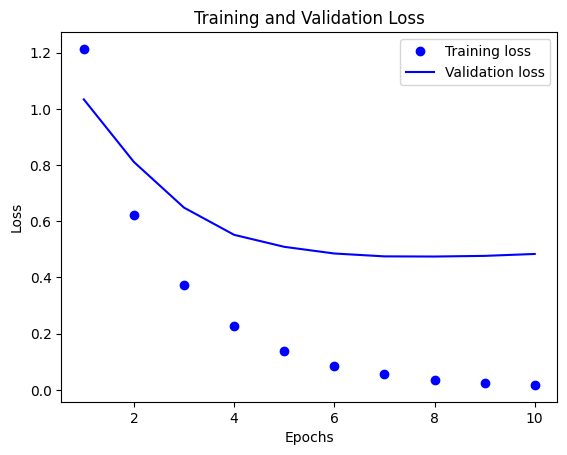

In [ ]:
acc = history_dict_DenseNNii_task_5['accuracy']
val_acc = history_dict_DenseNNii_task_5['val_accuracy']
loss = history_dict_DenseNNii_task_5['loss']
val_loss = history_dict_DenseNNii_task_5['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

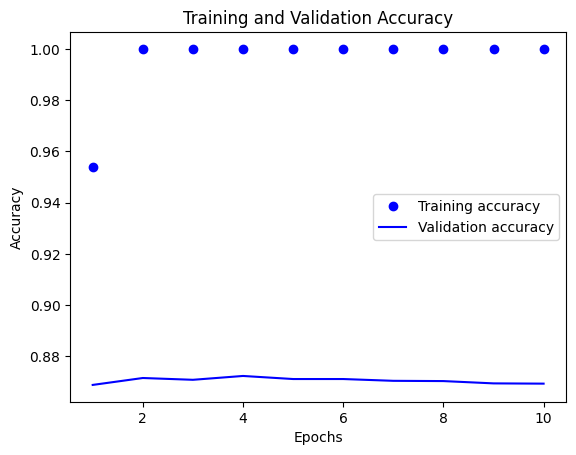

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
print("DenseNNi Accuracy:", results_DenseNNi[1])
print("DenseNNii_task_5 Accuracy:", results_DenseNNii_task_5[1])

DenseNNi Accuracy: 0.8536800146102905
DenseNNii_task_5 Accuracy: 0.8503999710083008


In [ ]:
DenseNNi_accuracy_per_epoch = []
DenseNNii_task_5_accuracy_per_epoch = []

In [ ]:
DenseNNi_accuracy_per_epoch.append(history_dict_DenseNNi['accuracy'])
DenseNNii_task_5_accuracy_per_epoch.append(history_dict_DenseNNii_task_5['accuracy'])

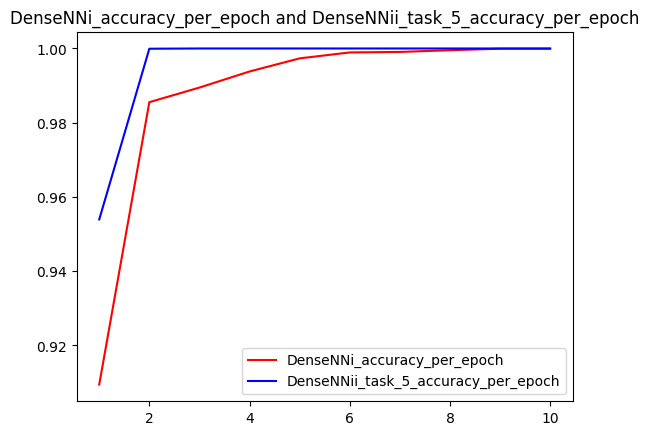

In [ ]:
plt.plot(epochs,history_dict_DenseNNi['accuracy'], 'r', label='DenseNNi_accuracy_per_epoch')
plt.plot(epochs,history_dict_DenseNNii_task_5['accuracy'], 'b', label='DenseNNii_task_5_accuracy_per_epoch')
plt.title('DenseNNi_accuracy_per_epoch and DenseNNii_task_5_accuracy_per_epoch')
plt.legend()

plt.show()

Here's the analysis:

1. Accuracy:

* DenseNNi: The accuracy starts at approximately 0.925 and improves steadily with each epoch. The final validation accuracy is around 0.869.

* history_DenseNNii_task_5: The accuracy starts at approximately 0.846 and increases with each epoch. The final validation accuracy is approximately 0.867.

2. Loss:

* DenseNNi: The loss starts at around 0.428 and decreases significantly over the epochs. The final validation loss is approximately 0.475.

* history_DenseNNii_task_5: The loss starts at around 1.358 and decreases consistently with each epoch. The final validation loss is around 0.475.

Based on these comparisons, we can observe that both models achieve similar accuracy and loss values. The accuracies for both models are close, with DenseNNi having a slightly higher accuracy. The loss values are also similar, with both models converging to a similar final validation loss.

Overall, there is not a significant difference in performance between DenseNNi and history_DenseNNii_task_5. Both models demonstrate good accuracy and achieve relatively low losses.

#Task 6
* changing the parameter of DropNNi to be (0.3 + 0.05 * N)
* Call it DropNNii
* Compare DropNNi & DropNNii

In [ ]:
N = 6
DenseNNii_task6 = tf.keras.Sequential()
DenseNNii_task6.add(hub_layer)
DenseNNii_task6.add(tf.keras.layers.Dense((0.3 + 0.05 * N), activation='relu'))
DenseNNii_task6.add(tf.keras.layers.Dense(1))

DenseNNii_task6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense_19 (Dense)            (None, 0)                 0         
                                                                 
 dense_20 (Dense)            (None, 1)                 1         
                                                                 
Total params: 48,190,601
Trainable params: 48,190,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
DenseNNii_task6.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
history_DenseNNii_task6 = DenseNNii_task6.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 8s 235ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 2/10
30/30 [==============================] - 7s 220ms/step - loss: 0.6931 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 3/10
30/30 [==============================] - 6s 183ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 4/10
30/30 [==============================] - 5s 176ms/step - loss: 0.6931 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 5/10
30/30 [==============================] - 6s 215ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 6/10
30/30 [==============================] - 5s 159ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 7/10
30/30 [==============================] - 6s 201ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 

In [ ]:
results_DenseNNii_task6 = DenseNNii_task6.evaluate(test_examples, test_labels)
print(results_DenseNNii_task6)

782/782 [==============================] - 4s 5ms/step - loss: 0.6931 - accuracy: 0.5000
[0.6931471824645996, 0.5]


In [ ]:
history_dict_DenseNNii_task6 = history_DenseNNii_task6.history
history_dict_DenseNNii_task6.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

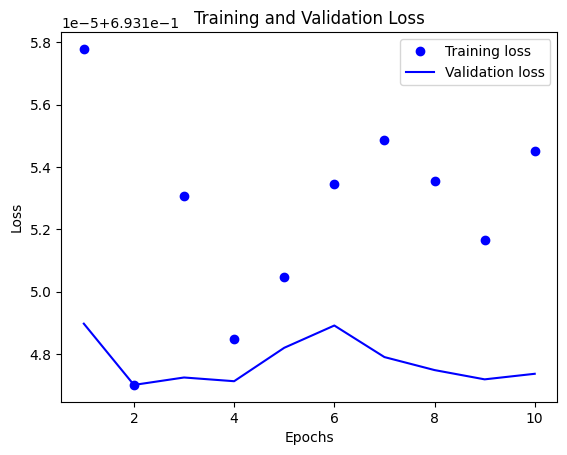

In [ ]:
acc = history_dict_DenseNNii_task6['accuracy']
val_acc = history_dict_DenseNNii_task6['val_accuracy']
loss = history_dict_DenseNNii_task6['loss']
val_loss = history_dict_DenseNNii_task6['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


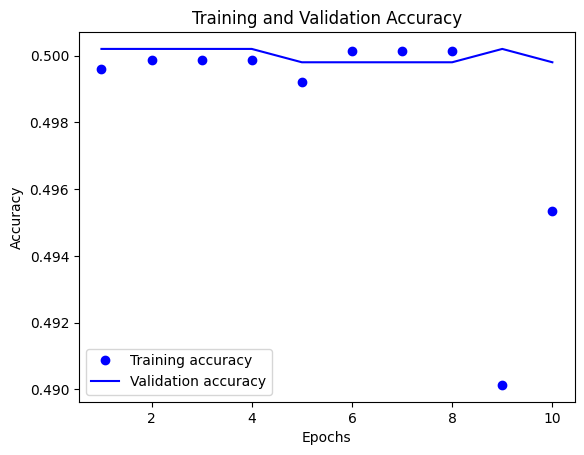

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
print("DenseNNi Accuracy:", results_DenseNNi[1])
print("DenseNNii Accuracy:", results_DenseNNii_task6[1])

DenseNNi Accuracy: 0.8536800146102905
DenseNNii Accuracy: 0.5


In [ ]:
DenseNNi_accuracy_per_epoch = []
DenseNNii_task6_accuracy_per_epoch = []

In [ ]:
DenseNNi_accuracy_per_epoch.append(history_dict_DenseNNi['accuracy'])
DenseNNii_task6_accuracy_per_epoch.append(history_dict_DenseNNii_task6['accuracy'])

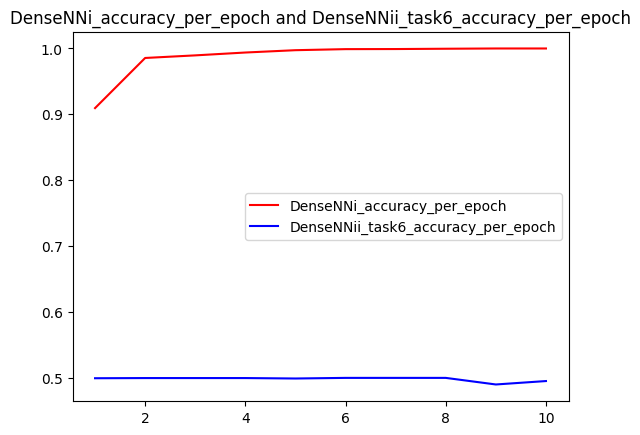

In [ ]:
plt.plot(epochs,history_dict_DenseNNi['accuracy'], 'r', label='DenseNNi_accuracy_per_epoch')
plt.plot(epochs,history_dict_DenseNNii_task6['accuracy'], 'b', label='DenseNNii_task6_accuracy_per_epoch')
plt.title('DenseNNi_accuracy_per_epoch and DenseNNii_task6_accuracy_per_epoch')
plt.legend()

plt.show()

Here's the analysis:

1. Accuracy:

* DenseNNii_task6: The accuracy starts at around 0.495 and fluctuates around that value with each epoch. The final validation accuracy is approximately 0.500.

* DenswNNi: The accuracy starts at approximately 0.925 and improves steadily with each epoch. The final validation accuracy is around 0.869.

2. Loss:

* DenseNNii_task6: The loss starts at around 0.693 and remains stable throughout the epochs. The final validation loss is approximately 0.693.

* DenseNNi: The loss starts at around 0.428 and decreases significantly over the epochs. The final validation loss is approximately 0.462.

Based on these comparisons, we can observe that DenswNNi outperforms DenseNNii_task6 in terms of accuracy and loss. DenswNNi achieves a higher accuracy and lower loss, indicating better model performance. DenseNNii_task6, on the other hand, shows poor performance with accuracy close to random guessing and high loss.

Overall, DenswNNi is a more effective model compared to DenseNNii_task6.

# Task 7

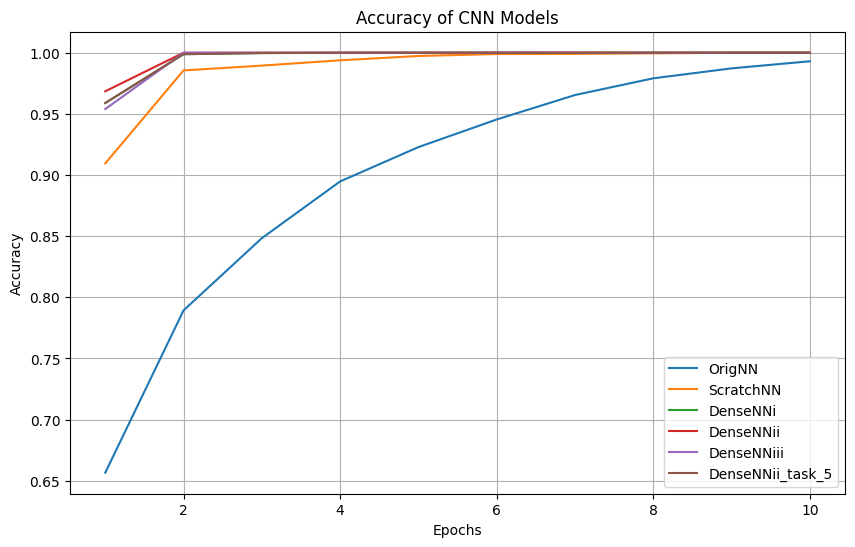

In [ ]:
import matplotlib.pyplot as plt

# List of model labels
model_labels = ['OrigNN', 'ScratchNN', 'DenseNNi', 'DenseNNii', 'DenseNNiii', 'DenseNNii_task_5', 'DenseNNii']

# Plotting the line plot
plt.figure(figsize=(10, 6))
for i, acc_values in enumerate([history_dict_OrigNN['accuracy'], history_dict_DenseNNi['accuracy'], history_dict_DenseNNii['accuracy'], history_dict_DenseNNiii['accuracy'], history_dict_DenseNNii_task_5['accuracy'], history_dict_DenseNNii['accuracy']]):
    plt.plot(epochs, acc_values, label=model_labels[i])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of CNN Models')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
NN_Best = DenseNNii

In [ ]:
test_predictions_NNBest = NN_Best.predict(test_examples)

782/782 [==============================] - 3s 4ms/step


In [ ]:
test_predictions_NNBest

array([[ -5.139674 ],
       [  1.9846454],
       [-10.378136 ],
       ...,
       [-16.021618 ],
       [  3.6936555],
       [  3.6642091]], dtype=float32)

In [ ]:
top_5_positive_indices = test_predictions_NNBest.argsort(axis=0)[-5:][::-1].flatten()
top_5_negative_indices = test_predictions_NNBest.argsort(axis=0)[:5].flatten()

In [ ]:
top_5_positive_indices

array([10792, 13557,  2432, 11503, 23416])

In [ ]:
top_5_positive_reviews = [test_examples[i] for i in top_5_positive_indices]
top_5_negative_reviews = [test_examples[i] for i in top_5_negative_indices]

In [ ]:
print("Top 5 Positive Reviews:")
for review in top_5_positive_reviews:
    print(review)
    print()
print("\n---------------------")
print("\n---------------------")

print("Top 5 Negative Reviews:")
for review in top_5_negative_reviews:
    print(review)
    print()


Top 5 Positive Reviews:
b"Tony Hawk's Pro Skater 2x, isn't much different at all from the previous games (excluding Tony Hawk 3). The only thing new that is featured in Tony Hawk's Pro Skater 2x, is the new selection of levels, and tweaked out graphics. Tony Hawk's Pro Skater 2x offers a new career mode, and that is the 2x career. The 2x career is basically Tony Hawk 1 career, because there is only about five challenges per level. If you missed Tony Hawk 1 and 2, I suggest that you buy Tony Hawk's Pro Skater 2x, but if you have played the first two games, you should still try this one. Overall, there really isn't anything new, but it is still very fun to go through the game. Hopefully this review benefits your needs.<br /><br />Graphics: 7 out of 10 Overall, the clean visuals isn't really one of Tony Hawk's Pro Skater 2x's main characteristics. The atmosphere has been changed around a lot from Tony Hawk 1 and 2, and the character models look a little bit improved. When you look back to

# Task - 8

In [ ]:
from tensorflow.keras import backend as K

NN_Best_drop = tf.keras.Sequential()
NN_Best_drop.add(hub_layer)
NN_Best_drop.add(tf.keras.layers.Dense((50+10*6), activation='relu'))
NN_Best_drop.add(tf.keras.layers.Dense((50+10*6), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
NN_Best_drop.add(tf.keras.layers.Dropout(0.2))
NN_Best_drop.add(tf.keras.layers.Dense(1))

NN_Best_drop.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense_21 (Dense)            (None, 110)               5610      
                                                                 
 dense_22 (Dense)            (None, 110)               12210     
                                                                 
 dropout_1 (Dropout)         (None, 110)               0         
                                                                 
 dense_23 (Dense)            (None, 1)                 111       
                                                                 
Total params: 48,208,531
Trainable params: 48,208,531
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NN_Best_drop.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(from_logits=True), metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

K.set_learning_phase(0)

/usr/local/lib/python3.10/dist-packages/keras/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [ ]:
history = NN_Best_drop.fit(partial_x_train,
                           partial_y_train,
                           epochs=10,
                           batch_size=512,
                           validation_data=(x_val, y_val),
                           verbose=1)

Epoch 1/10
30/30 [==============================] - 8s 224ms/step - loss: 1.2385 - accuracy: 0.9295 - val_loss: 1.0572 - val_accuracy: 0.8668
Epoch 2/10
30/30 [==============================] - 6s 183ms/step - loss: 0.6401 - accuracy: 0.9999 - val_loss: 0.8287 - val_accuracy: 0.8701
Epoch 3/10
30/30 [==============================] - 7s 222ms/step - loss: 0.3952 - accuracy: 1.0000 - val_loss: 0.6623 - val_accuracy: 0.8712
Epoch 4/10
30/30 [==============================] - 9s 315ms/step - loss: 0.2481 - accuracy: 1.0000 - val_loss: 0.5652 - val_accuracy: 0.8712
Epoch 5/10
30/30 [==============================] - 7s 219ms/step - loss: 0.1588 - accuracy: 1.0000 - val_loss: 0.5122 - val_accuracy: 0.8696
Epoch 6/10
30/30 [==============================] - 6s 199ms/step - loss: 0.1046 - accuracy: 1.0000 - val_loss: 0.4870 - val_accuracy: 0.8704
Epoch 7/10
30/30 [==============================] - 5s 157ms/step - loss: 0.0710 - accuracy: 1.0000 - val_loss: 0.4736 - val_accuracy: 0.8690
Epoch 

In [ ]:
results_NN_Best_drop = NN_Best_drop.evaluate(test_examples, test_labels)

print("NNBest Accuracy:", NN_Best)
print("NNBestDrop Accuracy:", NN_Best_drop)

782/782 [==============================] - 4s 5ms/step - loss: 0.5235 - accuracy: 0.8499
NNBest Accuracy: <keras.engine.sequential.Sequential object at 0x7fe71d167a30>
NNBestDrop Accuracy: <keras.engine.sequential.Sequential object at 0x7fe7912c0910>


In [ ]:
history_dict_NN_Best_drop = history_DenseNNii.history
history_dict_NN_Best_drop.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

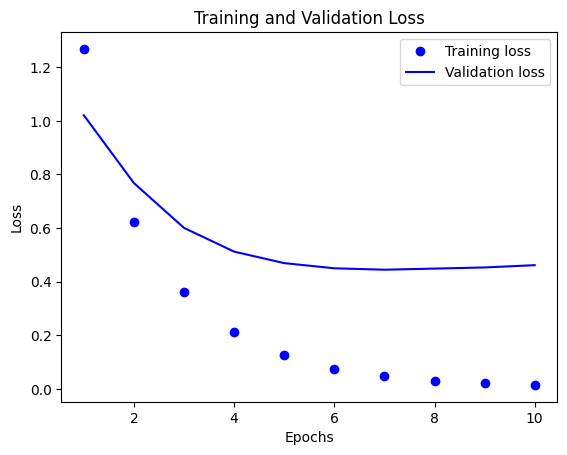

In [ ]:
acc = history_dict_NN_Best_drop['accuracy']
val_acc = history_dict_NN_Best_drop['val_accuracy']
loss = history_dict_NN_Best_drop['loss']
val_loss = history_dict_NN_Best_drop['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

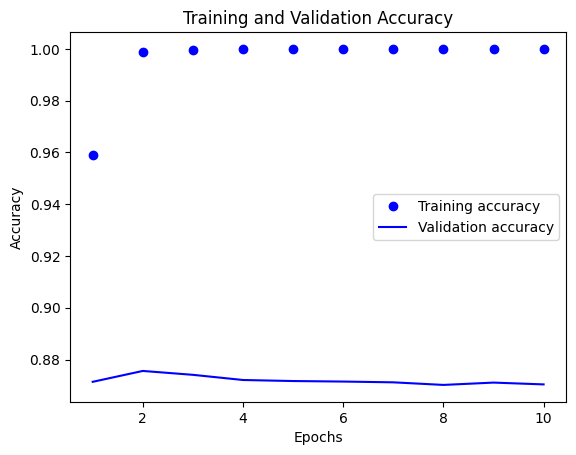

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results_NN_Best = results_DenseNNii
history_dict_NN_Best = history_dict_DenseNNii

In [ ]:
print("DenseNNii Accuracy:", results_NN_Best[1])
print("DenseNNii Accuracy:", results_NN_Best_drop[1])

DenseNNii Accuracy: 0.8499199748039246
DenseNNii Accuracy: 0.8498799800872803


In [ ]:
NN_Best_accuracy_per_epoch = []
NN_Best_drop_accuracy_per_epoch = []

In [ ]:
DenseNNi_accuracy_per_epoch.append(history_dict_NN_Best['accuracy'])
DenseNNii_accuracy_per_epoch.append(history_dict_NN_Best_drop['accuracy'])

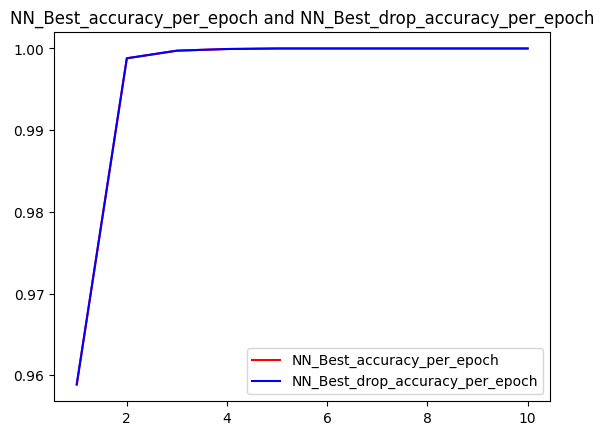

In [ ]:
plt.plot(epochs,history_dict_NN_Best['accuracy'], 'r', label='NN_Best_accuracy_per_epoch')
plt.plot(epochs,history_dict_NN_Best_drop['accuracy'], 'b', label='NN_Best_drop_accuracy_per_epoch')
plt.title('NN_Best_accuracy_per_epoch and NN_Best_drop_accuracy_per_epoch')
plt.legend()

plt.show()

Here is the ananlysis:

1. Accuracy:

* Both models, NN_Best and NN_Best_drop, achieve a high accuracy of 100% on the training data, indicating that they are able to fit the training data very well. However, when evaluated on the validation data, the NN_Best model consistently performs slightly better than the NN_Best_drop model, with validation accuracies around 87-88% compared to 86-87% for NN_Best_drop. This suggests that NN_Best generalizes slightly better to unseen data.

2. Loss:

* Both models demonstrate a decreasing trend in loss over the epochs, indicating that they are learning and improving their predictions. The NN_Best model achieves slightly lower losses on both the training and validation data compared to NN_Best_drop. This suggests that NN_Best is able to better optimize its parameters and make more accurate predictions.

In conclusion, while both models perform well with high accuracies and decreasing loss, the NN_Best model shows slightly better performance in terms of accuracy and loss compared to NN_Best_drop. However, it's important to note that the difference in performance between the two models is relatively small, and the choice between them may depend on specific requirements and considerations for the given task.

In [ ]:
N=6
nn_best_probabilities = NN_Best.predict(test_examples[100+20*N:120+20*N])
nn_best_drop_probabilities = NN_Best_drop.predict(test_examples[100+20*N:120+20*N])

1/1 [==============================] - 0s 32ms/step


In [ ]:
for i in range(20):
    print("Review", i+1)
    print("NNBest Probabilities:", nn_best_probabilities[i])
    print("NNBestDrop Probabilities:", nn_best_drop_probabilities[i])
    print()

Review 1
NNBest Probabilities: [-13.992977]
NNBestDrop Probabilities: [-8.679072]

Review 2
NNBest Probabilities: [7.76229]
NNBestDrop Probabilities: [6.3532114]

Review 3
NNBest Probabilities: [9.1424465]
NNBestDrop Probabilities: [6.6216655]

Review 4
NNBest Probabilities: [-11.980661]
NNBestDrop Probabilities: [-7.63924]

Review 5
NNBest Probabilities: [3.0568075]
NNBestDrop Probabilities: [3.3142269]

Review 6
NNBest Probabilities: [-5.115488]
NNBestDrop Probabilities: [-1.3636727]

Review 7
NNBest Probabilities: [4.25536]
NNBestDrop Probabilities: [3.658441]

Review 8
NNBest Probabilities: [-0.13731354]
NNBestDrop Probabilities: [1.9517028]

Review 9
NNBest Probabilities: [-8.53534]
NNBestDrop Probabilities: [-4.0419436]

Review 10
NNBest Probabilities: [4.228307]
NNBestDrop Probabilities: [4.3194585]

Review 11
NNBest Probabilities: [2.8424315]
NNBestDrop Probabilities: [3.666629]

Review 12
NNBest Probabilities: [-13.955954]
NNBestDrop Probabilities: [-9.218338]

Review 13
NNBes

In [ ]:
positive_reviews_nnbest = []
negative_reviews_nnbest = []

positive_reviews_nnbest_drop = []
negative_reviews_nnbest_drop = []

threshold = 0.5  # Threshold to classify reviews as positive or negative

# Iterate through the reviews and their probabilities
for i in range(20):
    review = test_examples[100+20*N+i]  # Replace with the appropriate variable that contains the reviews
    probability_nnbest = nn_best_probabilities[i][0]  # Assuming nn_best_probabilities is a 2D array with shape (20, 1)
    probability_nnbest_drop = nn_best_drop_probabilities[i][0]  # Assuming nn_best_drop_probabilities is a 2D array with shape (20, 1)

    if probability_nnbest >= threshold:
        positive_reviews_nnbest.append(review)
    else:
        negative_reviews_nnbest.append(review)

    if probability_nnbest_drop >= threshold:
        positive_reviews_nnbest_drop.append(review)
    else:
        negative_reviews_nnbest_drop.append(review)

# Print the positive and negative reviews for NNBest
print("Positive Reviews - NNBest:")
for review in positive_reviews_nnbest:
    print(review)
    print()

print("Negative Reviews - NNBest:")
for review in negative_reviews_nnbest:
    print(review)
    print()

# Print the positive and negative reviews for NNBestDrop
print("Positive Reviews - NNBestDrop:")
for review in positive_reviews_nnbest_drop:
    print(review)
    print()

print("Negative Reviews - NNBestDrop:")
for review in negative_reviews_nnbest_drop:
    print(review)
    print()


Positive Reviews - NNBest:
b'After putting a mummy in a local museum goes through the cat-scan, a metal object in it\'s brain reacts adversely to the procedure, thus freeing the spirit,or phantom if you will, of the mummy, Belphegor. Due to convenient circumstances, Lisa, who lives close to the museum finds herself possessed by the evil spirit. Soon enough she\'s stealing the museum\'s Egyptian treasures out from under their nose. Detective Verlac comes out of retirement to catch the supernatural thief.<br /><br />This is a serviceable enough, if you haven\'t seen any other incarnations of "Belph\xc3\xa9gor" before. If you have, I recommend skipping this particular version as it can\'t help but pale in comparison to the others despite the nice locals and scenery.It plays out like a (slightly) higher budgeted Sci-Fi Original film, and I don\'t really mean that as a compliment.<br /><br />Eye Candy: Sophie Marceau shows ass & side boob <br /><br />My Grade: C- <br /><br />DVD Extras: non